# Ensemble Methods

Ensemble methods are powerful machine learning techniques that combine the predictions of multiple models to improve overall performance. The idea is that different models will have different strengths and weaknesses, and by aggregating their predictions, we can reduce errors and achieve better results.

## Why Use Ensemble Methods?

- **Error Reduction**: Different models make different types of errors. By combining their predictions, we can cancel out individual errors and improve accuracy.
- **Robustness**: Ensemble methods are less likely to overfit compared to individual models, as they generalize better across datasets.
- **Improved Predictions**: By leveraging the strengths of multiple models, ensemble methods often outperform single models in terms of predictive performance.

## Ensemble Method Methods

1. **Bagging (Bootstrap Aggregating)**:
    - Example: Random Forests
    - Combines predictions from multiple models trained on different subsets of the data.

2. **Boosting**:
    - Example: Gradient Boosting, AdaBoost
    - Sequentially trains models, with each model focusing on correcting the errors of the previous one, __Boosting__ its importance to the model.

3. **Voting/Weighted Averaging**:
    - Combines predictions by taking a majority vote (for classification) or averaging (for regression).

## Application in This Notebook

In this notebook, we will explore ensemble methods by combining the following models:
- **K-Means Clustering**: A clustering algorithm for grouping data points.
- **Decision Trees in Random Forests**: A bagging-based ensemble method for classification and regression.
- **Logistic Regression**: A simple yet effective linear model for binary classification.

In [17]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:200], banknote_df.iloc[762:962]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['skewness', 'entropy']].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

### AdaBoost

A tool from the sklearn package, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a *relative weight*. The next classifier is then trained on the dataset using these relative weights, and so on. 

Here it is used with a Random Forrest, with very good results. It performes significantly better than a single decision tree.

In [20]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=42), 
                             n_estimators = 15,
                             algorithm = "SAMME",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        85
           1       0.82      0.93      0.88        75

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160
 



/home/jaltman/anaconda3/envs/ML_12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [21]:
lone_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
lone_clf.fit(X_train, y_train)
lone_y_pred = lone_clf.predict(X_test)
print(f"Single Tree Classification Report")
print(classification_report(y_test, lone_y_pred), "\n")

Single Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        85
           1       0.67      0.88      0.76        75

    accuracy                           0.74       160
   macro avg       0.76      0.75      0.74       160
weighted avg       0.77      0.74      0.74       160
 



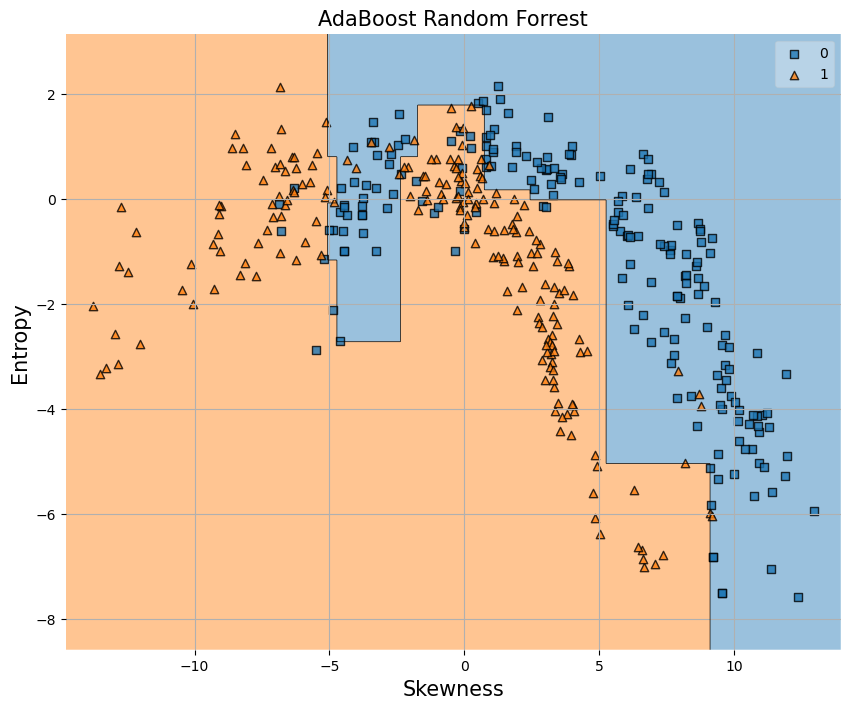

In [22]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.title("AdaBoost Random Forrest", fontsize = 15)
plt.grid()
plt.show()

### Gradient Boosting

Similar to AdaBoosting in that it puts more focus on terms that are classified incorrectly, but what this does specifically is try to fit the new model to the old one's residual error. This makes it well suited to regression, which I will show by looking at only one of the data groups in the above dataset.

In [23]:
X = X[0:200,:]
X = X[X[:, 0].argsort()]


y = X[0:200,1]
X = X[0:200,0]
X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y[0:200],
                                                    test_size = 0.4, 
                                                    random_state = 42)


In [24]:
from sklearn.tree import DecisionTreeRegressor


tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2) #trains on the difference

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)#trains on the difference

DecisionTreeRegressor(max_depth=2, random_state=42)

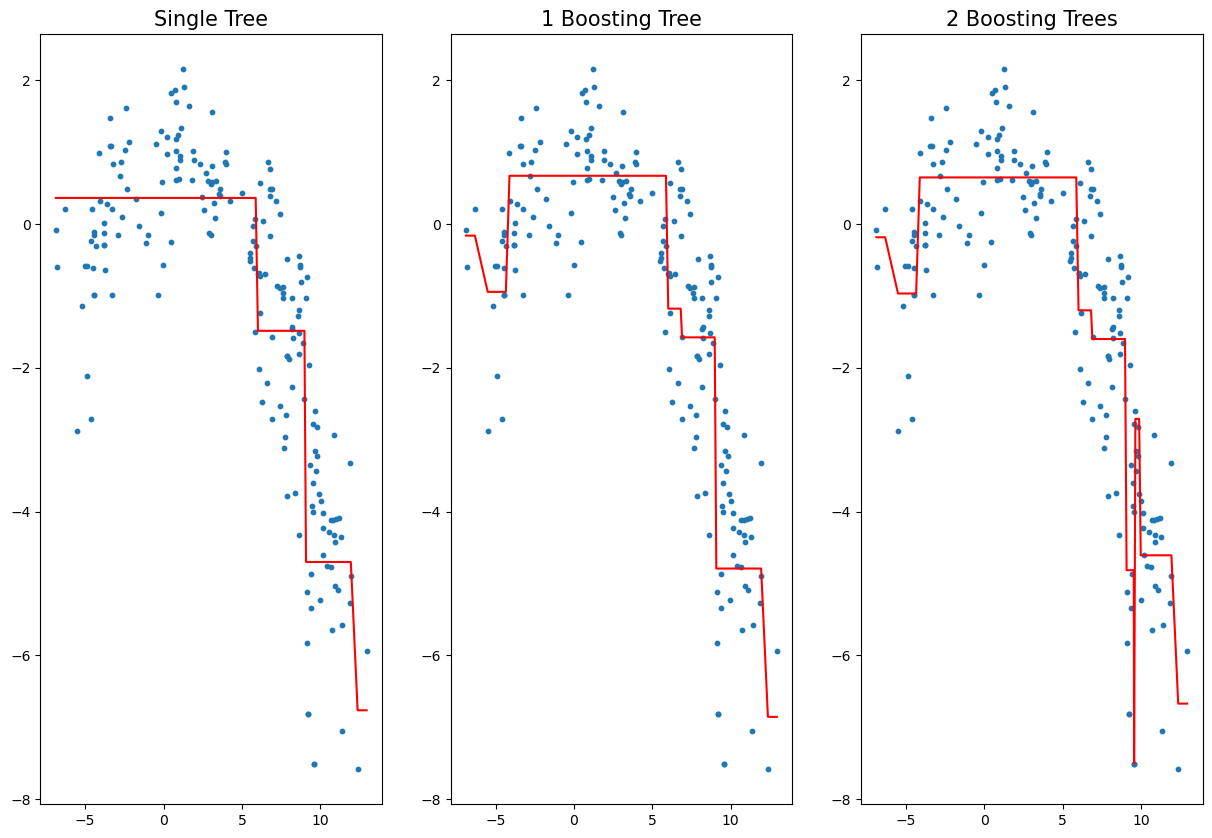

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))



ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("Single Tree", fontsize = 15)


ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("1 Boosting Tree", fontsize = 15)


ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("2 Boosting Trees", fontsize = 15)

plt.show()

### Comments

With every extra model in the boosting algoithm, the sites with significant error are targeted and molded to fit the data better. An intersting thing is that on the far right model, the regression line drops down wildly to pick up more data, even though there is a reasonably smooth data trend through there. Part of this is overfitting, but another part is how the model counts error. It checks the y-distance between the regression line and the data points, so when the data trend is very steep it only sees that there is data far below the regression line and fails to see that the point is very close to the regression line in the x-direction. 

### Sklearn Gradient Boosting

We will now compare this simple model to the sklearn implementation which works with many more estimators.

It closely follows the data, which is good, but it is also very jumpy which makes me think it is overfitted and is following the noise of the curve.

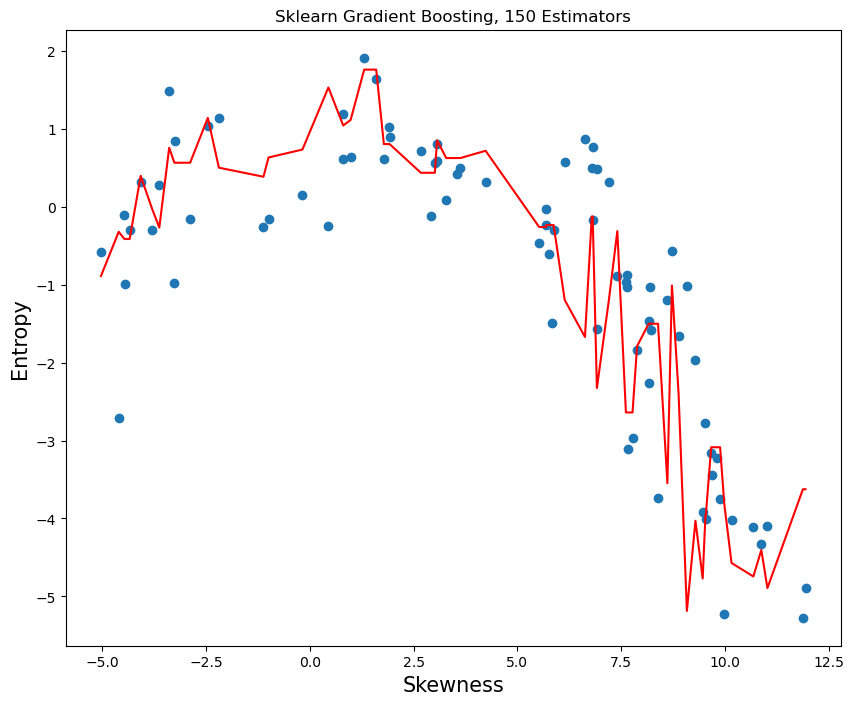

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.title("Sklearn Gradient Boosting, 150 Estimators")
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.show()

### Multi-Model Voting

Here we will combine:
- **K-Means Clustering**
- **Decision Trees in Random Forests**
- **Logistic Regression**
Into an ensemble method, with voting to determine the final classifications.

In [27]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:200], banknote_df.iloc[762:962]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['skewness', 'entropy']].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [28]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

k1 = ml.KNN(X_train,y_train,distance)

k1_y_pred = [k1.KNN_Predict(xi, 15) for xi in X_test]


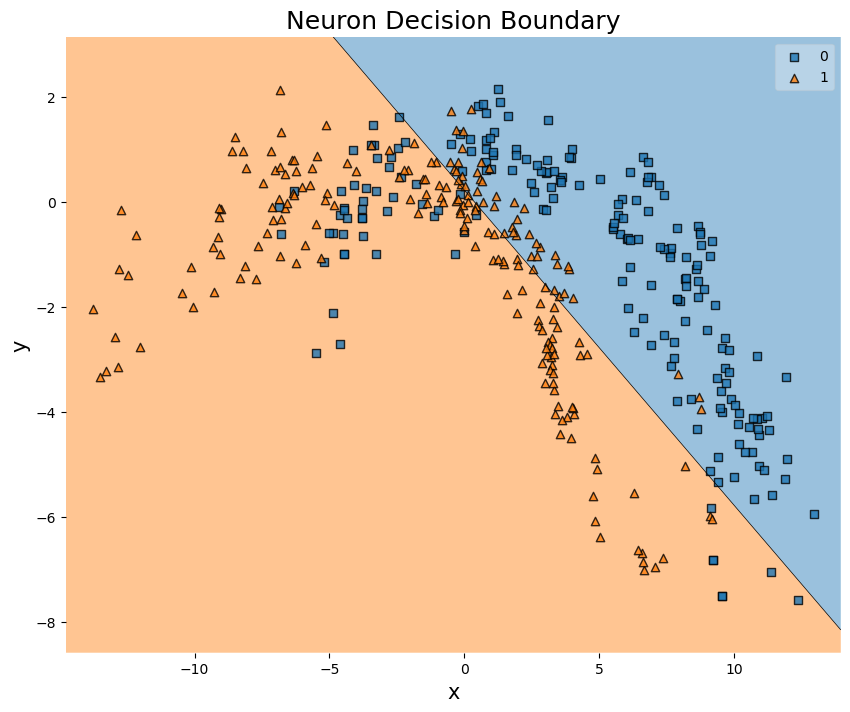

In [29]:
node = ml.Logistic_Regression_Neuron()

node.train(X_train, y_train, 0.001, 100) # the alpha learning rate and the number of periods

node.plot_decision_boundary(X,y)

node_y_pred = [node.predict(xi) for xi in X_test]

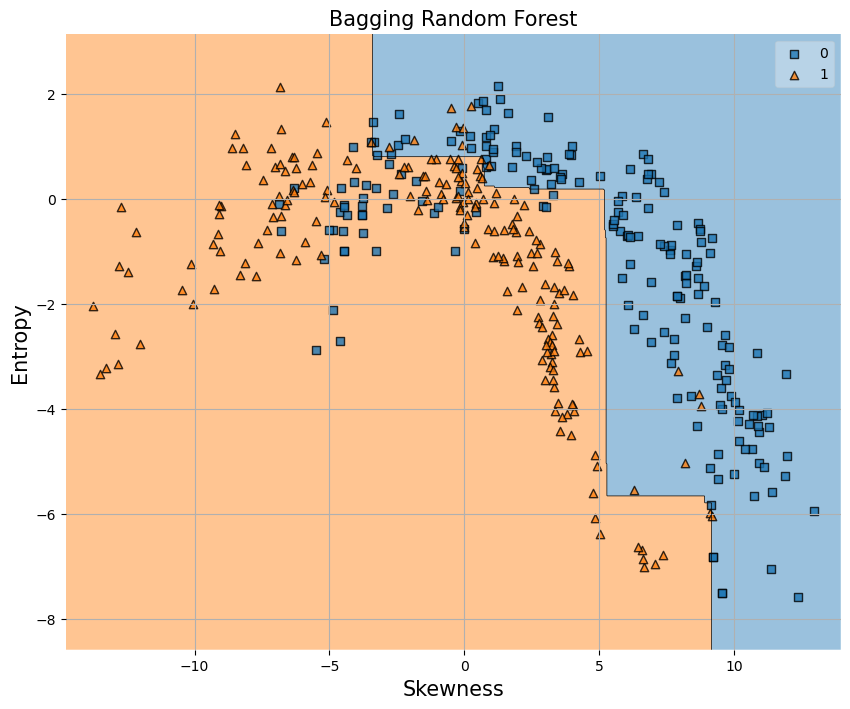

In [30]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.title("Bagging Random Forest", fontsize = 15)
plt.grid()
plt.show()

In [31]:
# Sum the predictions, average them, and apply activation
combined_pred = (np.array(k1_y_pred) + np.array(node_y_pred) + np.array(bag_y_pred)) / 3
activated_pred = (combined_pred > 0.5).astype(int)


mse = ml.mean_squared_error(y_test, k1_y_pred)
mse = np.sum(mse)/len(mse)
print(f"Mean Square Error of K-nearest neighbors: {mse}")

mse = ml.mean_squared_error(y_test, node_y_pred)
mse = np.sum(mse)/len(mse)
print(f"Mean Square Error of Logistic Neuron: {mse}")

mse = ml.mean_squared_error(y_test, bag_y_pred)
mse = np.sum(mse)/len(mse)
print(f"Mean Square Error of Random Forrest: {mse}")


mse = ml.mean_squared_error(y_test, activated_pred)
mse = np.sum(mse)/len(mse)
print(f"Mean Square Error of combined model: {mse}")

Mean Square Error of K-nearest neighbors: 0.046875
Mean Square Error of Logistic Neuron: 0.09422876063058624
Mean Square Error of Random Forrest: 0.1
Mean Square Error of combined model: 0.09375


### Comments:

For this dataset, K-nearest neighbors is the best by far, and the combined model only makes it worse, but if KNN is the best model for this situation, we can try an ensemble of KNN using a range of k-values.

After runnning the ensemble we see that there is a small benefit to the combination of KNN models over just one KNN model as seen above.

In [32]:
average_y_pred = np.zeros(len(y_test))
frac = 1/16 # since we are considering 16 models
for k in range (4,20):
    k1 = ml.KNN(X_train,y_train,distance)
    for i in range(len(y_test)):
        average_y_pred[i] += frac * k1.KNN_Predict(X_test[i], k)

activated_pred = (average_y_pred > 0.5).astype(int)
mse = ml.mean_squared_error(y_test, average_y_pred)
mse = np.sum(mse)/len(mse)
print(f"Mean Square Error of K-nearest neighbors Ensemble: {mse}")


Mean Square Error of K-nearest neighbors Ensemble: 0.04482421875
